<a href="https://colab.research.google.com/github/leejunho12316/HonGongMachine/blob/main/AICE_GPT_%ED%92%80%EC%9D%B42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
df = pd.read_csv('auto_mpg.csv')
df.drop('name', axis=1, inplace=True)
df.dropna(how='any', axis=0, inplace=True)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X=df.drop('mpg', axis=1)
y=df['mpg']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [50]:
#1
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

dt_pred = dt.predict(X_val)
rf_pred = rf.predict(X_val)

dt_score = mean_absolute_error(y_val, dt_pred)
rf_score = mean_absolute_error(y_val, rf_pred)
print(dt_score, rf_score)

7.102699999999999 5.374255000000002


In [10]:
#2
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_val_scaled)
score = mean_absolute_error(y_pred, y_val)
print(score)

7.753516291154326


In [15]:
#3
import numpy as np
print("rmse : ", np.sqrt(rf_score))

rmse :  2.3212819733931513


In [51]:
#4
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)

svr_pred = svr.predict(X_val_scaled)
print('mse: ', mean_absolute_error(y_val, y_pred))
print('mse: ', mean_squared_error(y_val, y_pred))

mse:  6.377457594776465
mse:  179.86545300710767


In [21]:
#5
from sklearn.metrics import mean_squared_log_error
print(mean_squared_log_error(dt_pred, y_val))

0.13051128202309825


In [27]:
#6
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_val)

print('r2 score : ', r2_score(xgb_pred, y_val))

r2 score :  0.30504403240474354


In [33]:
#7
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr, r, l = LinearRegression(), Ridge(), Lasso()
lr.fit(X_train_scaled, y_train)
r.fit(X_train_scaled, y_train)
l.fit(X_train_scaled, y_train)

lr_pred = lr.predict(X_val_scaled)
r_pred = r.predict(X_val_scaled)
l_pred = l.predict(X_val_scaled)

lr_score = r2_score(lr_pred, y_val)
r_score = r2_score(r_pred, y_val)
l_score = r2_score(l_pred, y_val)

print(lr_score, r_score, l_score)


-3.705300105104329 -3.8893608531210813 -24.220791390023564


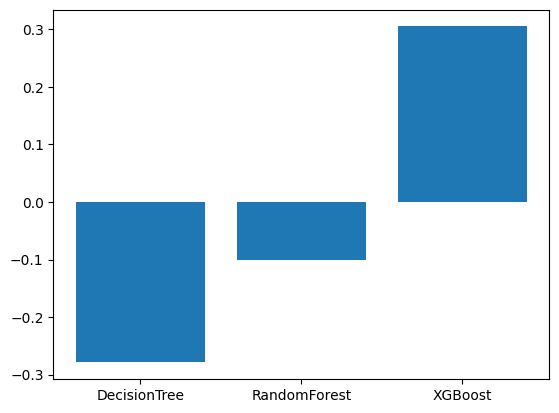

In [38]:
#8
import matplotlib.pyplot as plt

dt_score = r2_score(dt_pred, y_val)
rf_score = r2_score(rf_pred, y_val)
xgb_score = r2_score(xgb_pred, y_val)

plt.bar(x=['DecisionTree','RandomForest','XGBoost'], height = [dt_score, rf_score, xgb_score])
plt.show()

In [40]:
#9
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

svr = SVR()
knr = KNeighborsRegressor()

svr.fit(X_train_scaled, y_train)
knr.fit(X_train_scaled, y_train)
svr_pred = svr.predict(X_val_scaled)
knr_pred = knr.predict(X_val_scaled)
svr_score = r2_score(svr_pred, y_val)
knr_score = r2_score(knr_pred, y_val)
print(svr_score, knr_score)

-4.525761808073734 0.05826180329065822


In [41]:
#10
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_val)
score = r2_score(gbr_pred, y_val)

print(score>=0.7)

False


In [64]:
#11
dt_score = mean_absolute_error(y_val, dt_pred)
rf_score = mean_absolute_error(y_val, rf_pred)
svr_score = mean_absolute_error(y_val, svr_pred)
gbr_score = mean_absolute_error(y_val, gbr_pred)
knr_score = mean_absolute_error(y_val, knr_pred)
print(dt_score, rf_score, svr_score, gbr_score, knr_score)
#knr_score

7.102699999999999 5.374255000000002 6.377457594776465 4.892305353082637 4.7744800000000005


In [65]:
#12
svr_score1, svr_score2 = mean_absolute_error(y_val, svr_pred), mean_squared_error(y_val, svr_pred)
gbr_score1, gbr_score2 = mean_absolute_error(y_val, gbr_pred), mean_squared_error(y_val, gbr_pred)
rf_score1, rf_score2 = mean_absolute_error(y_val, rf_pred), mean_squared_error(y_val, rf_pred)

print((svr_score1 + svr_score2)/2, (gbr_score1 + gbr_score2)/2, (rf_score1 + rf_score2)/2)

93.12145530094207 35.57417884614072 45.85263466554999


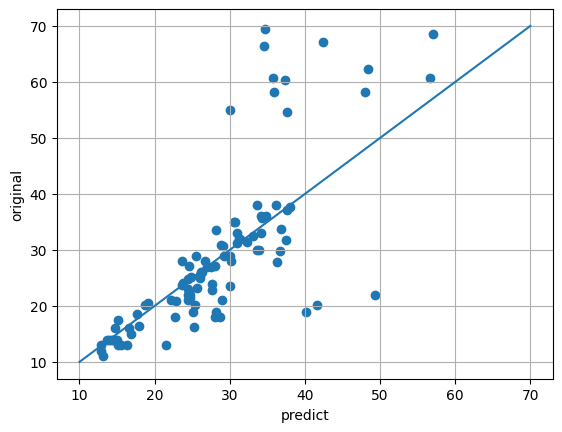

In [58]:
#16
plt.scatter(rf_pred, y_val)
plt.plot([10,70], [10,70])
plt.xlabel('predict')
plt.ylabel('original')
plt.grid()
plt.show()

<Axes: >

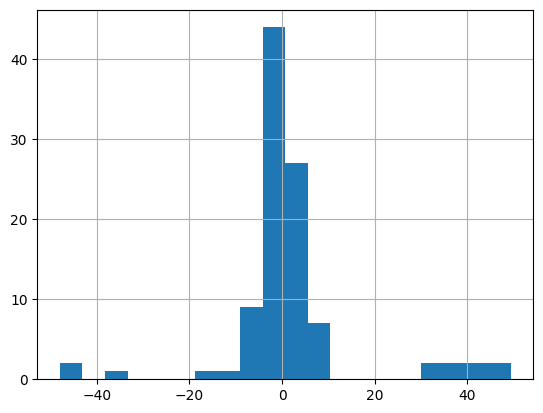

In [63]:
#17
difference = y_val - dt_pred
difference.hist(bins=20)